In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#Data Cleaning
data=pd.read_csv("../data/heart.csv")
print(data.isna().sum())
data.shape
print(data["HeartDisease"].value_counts())
data=data[data["Cholesterol"]>0]
data["Sex"]=data["Sex"].map({'M':1,'F':0})
data_encoded=pd.get_dummies(data,drop_first=True)


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
HeartDisease
1    508
0    410
Name: count, dtype: int64


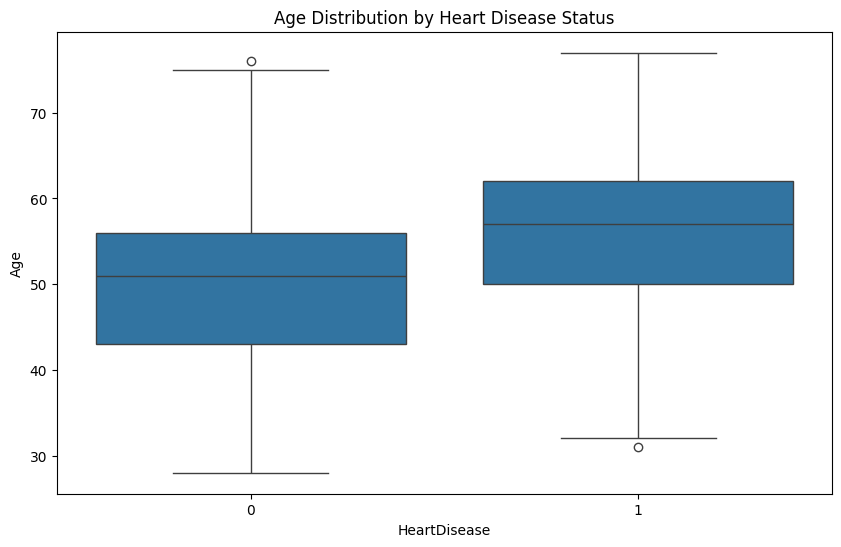

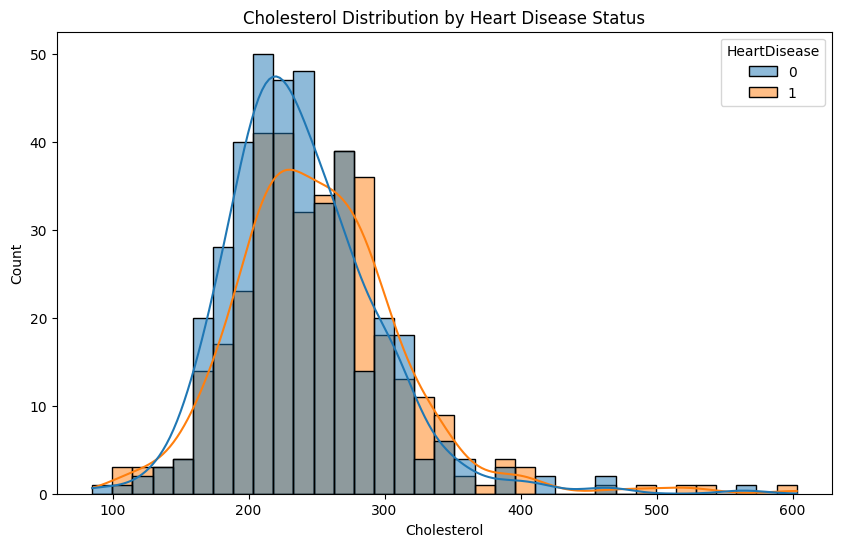

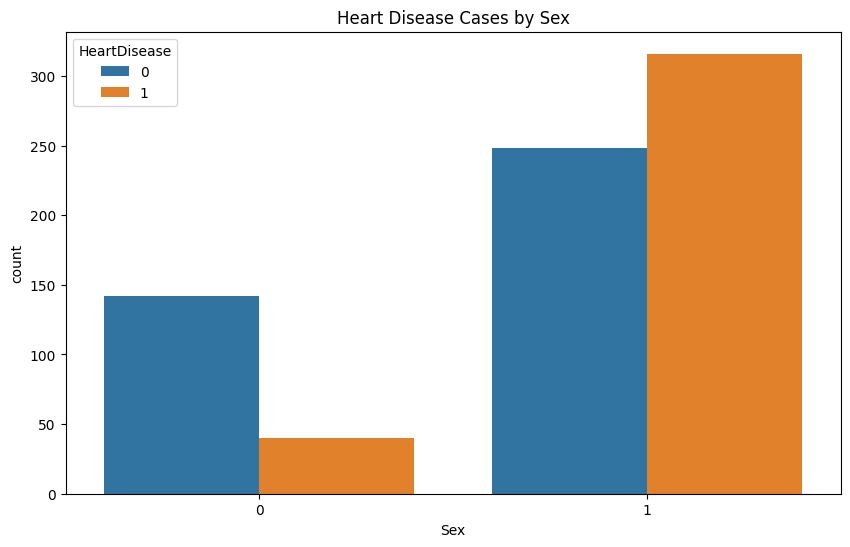

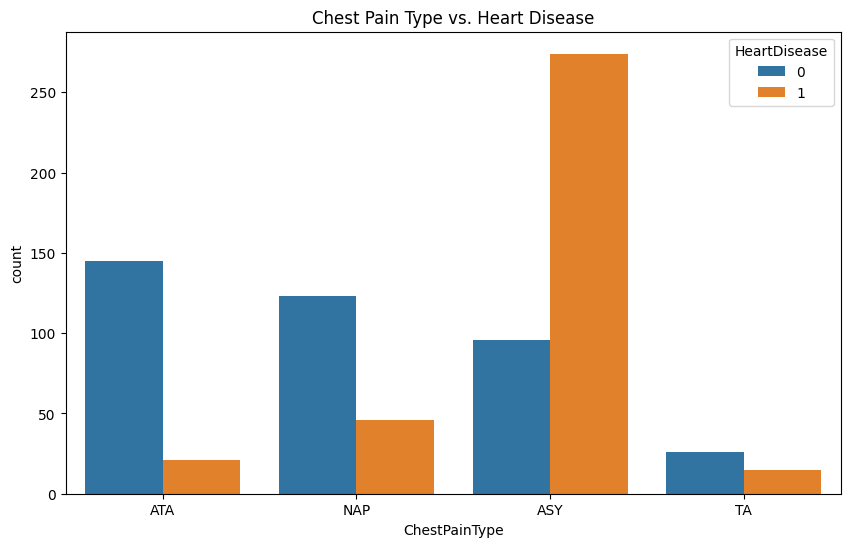

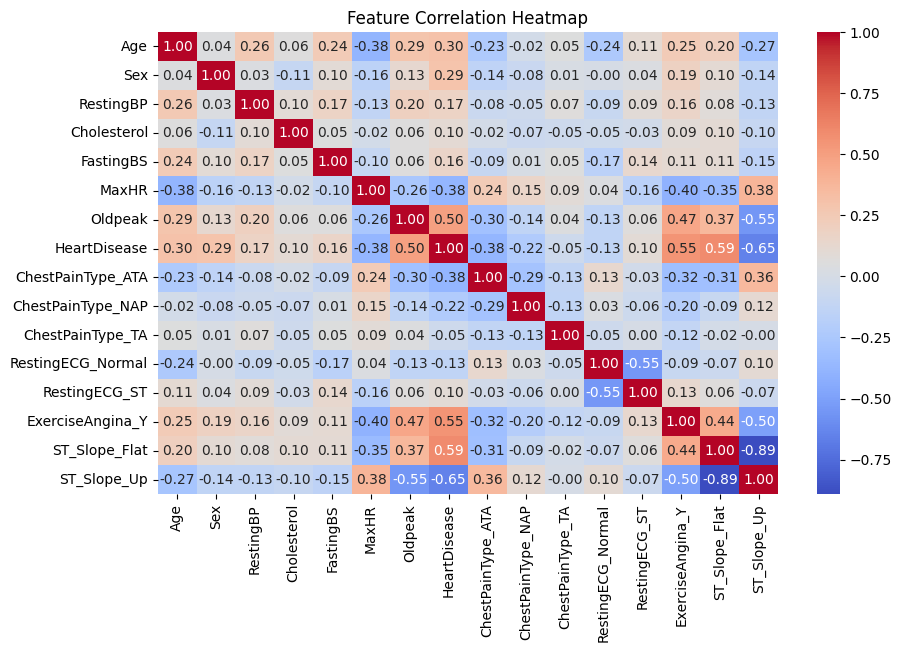

In [45]:
#EDA

#age vs Heart disease
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x="HeartDisease",y="Age")
plt.title("Age Distribution by Heart Disease Status")
plt.savefig("../outputs/age_vs_heartdisease.png")
plt.show()

#Cholesterol Distribution
plt.figure(figsize=(10,6))
sns.histplot(data=data,x="Cholesterol",hue="HeartDisease",kde=True)
plt.title("Cholesterol Distribution by Heart Disease Status")
plt.savefig("../outputs/cholesterol_distribution.png")
plt.show()

#Sex vs Heart Disease
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="Sex",hue="HeartDisease")
plt.title("Heart Disease Cases by Sex")
plt.savefig("../outputs/sex_vs_heartdisease.png")
plt.show()

#Chest Pain Type
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="ChestPainType",hue="HeartDisease")
plt.title("Chest Pain Type vs. Heart Disease")
plt.savefig("../outputs/chestpain_vs_heartdisease.png")
plt.show()

#Correlation
plt.figure(figsize=(10,6))
sns.heatmap(data_encoded.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig("../outputs/correlation_heatmap.png")
plt.show()

In [51]:
#Data Processing
#Scale Numeric Features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
num_cols=["Age","RestingBP","Cholesterol","MaxHR"]
data_encoded[num_cols]=scaler.fit_transform(data_encoded[num_cols])
data_encoded.to_csv("../data/heart_processed.csv",index=False)